# 군집 평가(Cluster Evaluation)

* 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미 부여
* 동일한 분류 값에 속하더라도 그 안에서 더 세운화된 군집화를 추구
* 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화

### 대표적인 군집화 평가 방법 : 실루엣 분석(silhouette analysis)

각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타내는 군집화 평가 방법(효율적 분리란, 다른 군집과는 떨어져있고, 동일 군집끼리는 가깝게 뭉쳐있는 것).
* 직관적으로 이해 쉬움
* 데이터 별로 다른 데이터와의 거리를 반복적으로 계산해야하기 때문에 데이터 양이 늘어나면 수행 시간 크게 증가, 메모리 부족 => 군집별로 임의의 데이터를 샘플링해 계수 평가

#### 실루엣 계수(silhouette coefficient)
* 개별 데이터가 가지는 군집화 지표.
* 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집과는 얼마나 떨어져 있는지 나타내는 지표.

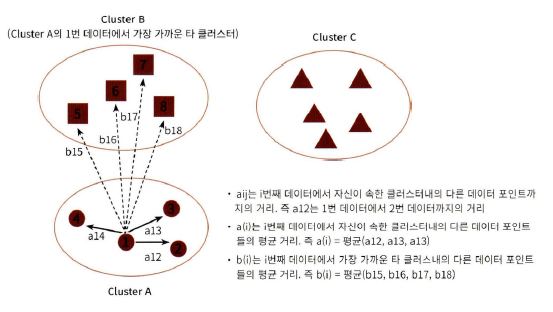

---
<br/>

#### i 번째 데이터 포인트의 실루엣 계수 값 s(i)

<div align="center">

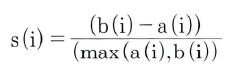

</div>


* a(i) : 특정 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
* b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
* 실루엣 계수 s(i) : 두 군집 간의 거리가 얼마나 떨어져 있는지(b(i)-a(i))를 max(a(i), b(i))로 나누어 정규화한 값.
    * 실루엣 계수는 -1 ~ 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 뜻이고, 0에 가까울 수록 근처 군집과 가까워진다는 것이다. - 값은 아예 다른 군집에 데이터 포인트가 할당되었음을 나타냄.

    * sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds):
        각 데이터 포인트의 실루엣 계수를 계산해 반환
    
    * sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds):
        전체 데이터의 실루엣 계수 값을 평균해 반환. -> np.mean(silhouette_samples()) -> 값이 높을수록 군집화가 어느 정도 잘되었음.(무조건 잘된건 아님)

### 좋은 군집화 조건
* 전제 실루엣 계수의 평균값이 0~1사의 값을 가지며, 1에 가까울수록 좋음
* 개별 군집의 평균값의 편차가 크지 않아야 한다.(개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요.)

In [1]:
# 붓꽃 데이터 세트를 이용한 군집 평가
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [2]:
# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


평균 실루엣 계수 값은 약 0.553이다.

1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내고, 1번 군집이 아닌 경우 실루엣 계수 값이 평균보다 낮을 것.

In [3]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

1번 군집의 실루엣 계수 평균 값은 0.79인데, 0번과 1번은 각각 0.41, 0.45로 1번 군집보다 낮다.

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값보다 높다해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없다.(특정 군집 내의 실루엣 계수 값만 높을 수 있기 때문에)

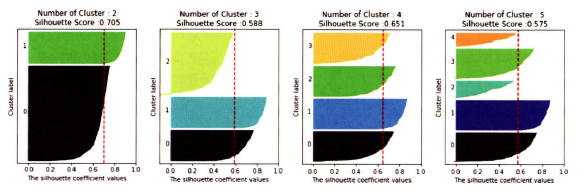


* X축 : 실루엣 계수 값
* Y축 : 개별 군집과 이에 속하는 데이터(높이로 추측)
* 점선 : 전체 평균 실루엣 계수 값

1번 군집 데이터의 경우 군집 개수는 2이다. Y축에 0, 1로 표시되어있다. 1번 군집의 모든 데이터는 평군 실루엣 계수 값 이상이다.

2번 군집 데이터의 경우 평균보다 적은 데이터 값이 매우 많다(2).



#### 군집 개수 = 2(평균 실루엣 계수 값 : 0.704

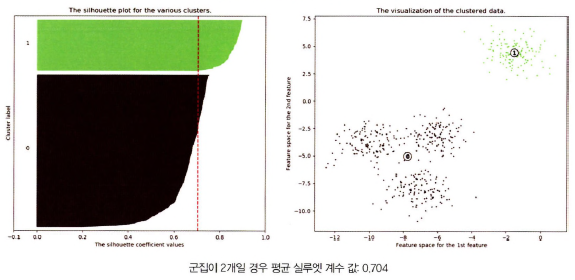

* 1번 군집의 경우 0번 군집과 멀리 떨어져있고, 내부 데이터 끼리도 잘 뭉쳐있다. 
* 0번 군집의 경우 내부 데이터끼리 많이 떨어져있는 모습이다.

#### 군집 개수 = 3 (평균 실루엣 계수 : 0.588)

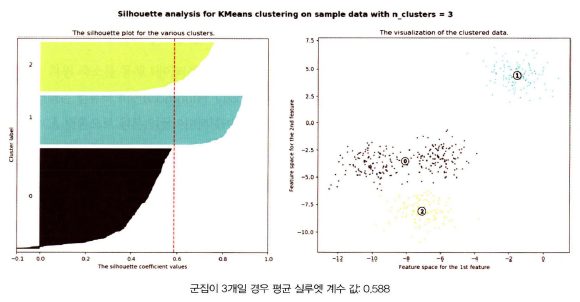

* 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있다.
* 0번의 경우 모두 평균보다 낮으며, 내부 데이터 간의 거리도 멀고 2번 군집과도 가깝게 위치하고 있다.

#### 군집 개수 = 4 (평균 실루엣 계수 : 0.65)

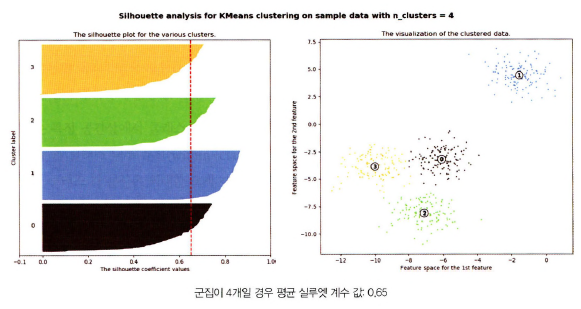

* 1번 군집의 경우 모든 데이터가 평균보다 높은 계수 값을 가지고 있다.
* 0번, 2번의 경우 절반 이상이 평균보다 높은 계수 값을 가지고 있다.
* 3번의 경우 약 1/3 정도가 평균보다 높은 계수 값을 가지고 있다.

* **=>군집이 2개일때보다는 평균 실루엣 계수 값이 작지만, 가장 이상적인 군집화 개수이다.**

In [4]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#### visualize_silhouette(cluster_lists, X_features)
군집 개수를 변화시키면서 K-평균 군집을 수행했을 때, 개별 군집별 평균 실루엣 계수 값을 시각화해서 군집의 개수를 정하는 도움을 준다.

* cluster_lists : 여러 개의 군집 개수를 리스트
* X_features : 피처 데이터 세트

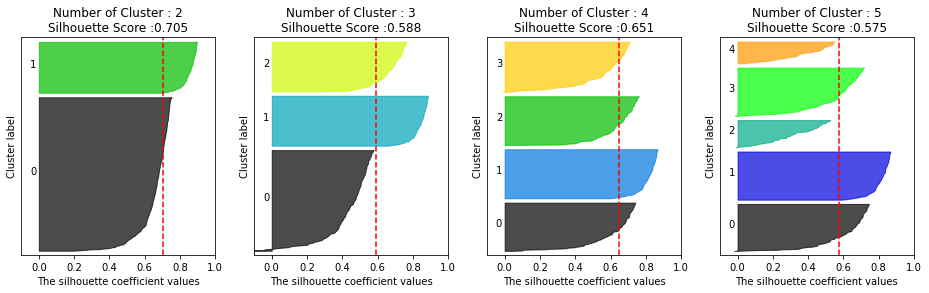

In [5]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

군집 개수가 4개 때 가장 최적임을 알 수 있다.

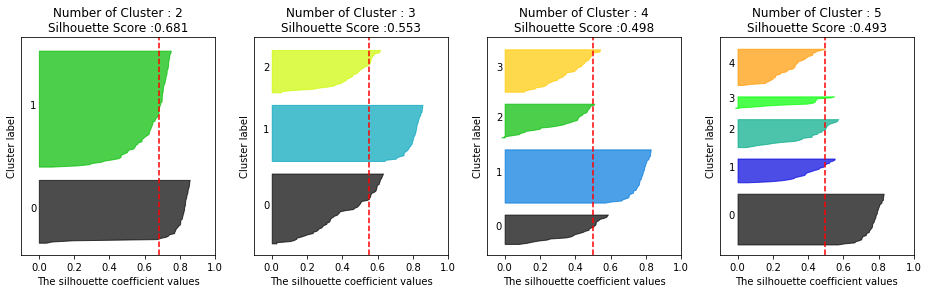

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

붓꽃 데이터를 K-평균으로 군집화할 경우 군집 개수를 2개로 하는 것이 가장 좋아보인다.

3개의 경우 평균 실루엣 계수 값도 2개보다 작고, 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 크다. 4개, 5개의 경우도 마찬가지다.

# 결론 

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 이 경우 군집별로 임의의 데이터 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 한다.